# matplotlib tutorial (9) nitta@tsuda.ac.jp

# Chapter 9: Bar Graph

## 9-1: Drawing a Bar Graph <code>pyplot.bar</code>

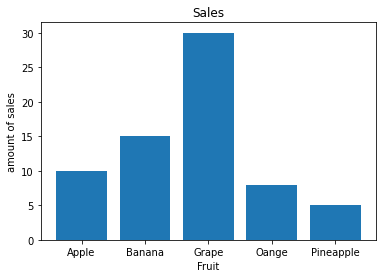

In [ ]:
# sample code 9-1
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-2: Eliminate the gap between bars in the bar graph

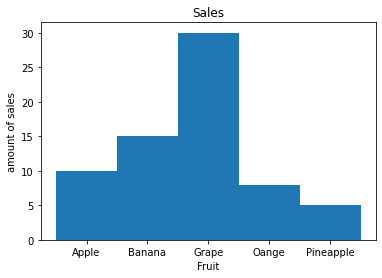

In [ ]:
# sample code 9-2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels, width=1.0)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-3: Set the bar color, border width and color respectively

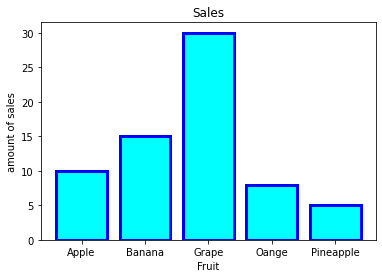

In [ ]:
# sample code 9-3
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels, color='cyan', edgecolor='blue', linewidth=3)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-4: Show error bar


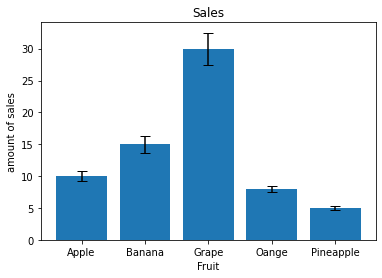

In [ ]:
# sample code 9-4
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']
errs = [0.8, 1.3, 2.5, 0.5, 0.3]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(x=xs, height=ys, tick_label=labels, yerr=errs, ecolor='black', capsize=5)
ax.set_title('Sales')
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')

plt.show()

## 9-5: Show error bars on a horizontal bar graph using <code>Axes.barh</code>

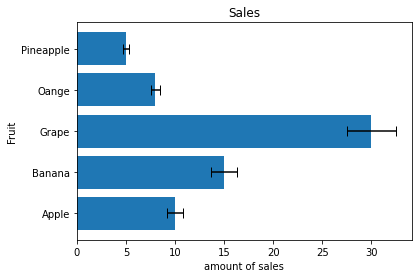

In [ ]:
# sample code 9-5
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = [1,2,3,4,5]
ys = [10, 15, 30, 8, 5]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']
errs = [0.8, 1.3, 2.5, 0.5, 0.3]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.barh(
    y=xs, 
    width=ys, 
    xerr=errs, 
    ecolor='black', 
    capsize=5
)
ax.set_yticks(xs)
ax.set_yticklabels(labels)

ax.set_title('Sales')
ax.set_ylabel('Fruit')
ax.set_xlabel('amount of sales')

plt.show()

## 9-6: Show error bars and axis values at the tip of 2-axis bar graph <code>Axes.bar</code>

You can use <code>Axes.bar</code> to create a 2-axis bar graph.
Place a label text indicating the value at the tip of the bar.

<code><font color="blue">matplotlib.axes.Axes.bar(x,height,width,bottom,*,align='center',**kwargs)</font></code>
...
The <code>width</code> of the bar is specified as a ratio of the width between the axes (default: 0.8).


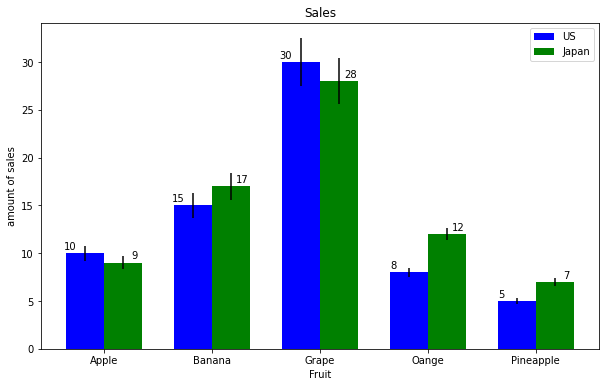

In [ ]:
from re import X
# sample code 9-6
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = np.array([1,2,3,4,5])
ys = [10, 15, 30, 8, 5]
ys2 = [9, 17, 28, 12, 7]
labels = ['Apple', 'Banana', 'Grape', 'Oange', 'Pineapple']
errs = [0.8, 1.3, 2.5, 0.5, 0.3]
errs2 = [0.7, 1.4, 2.4, 0.6, 0.4]

bar_w = 0.35   # bar width

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# left bar
rects1 = ax.bar(
    xs - bar_w,     # Shift the left edge of the bar by bar_w
    height=ys,
    width=bar_w,  # bar width
    align='edge',     # pace based on the left end of bar
    yerr=errs, 
    color='blue',
    ecolor='black', 
    label = 'US'
)
# right bar
rects2 = ax.bar(
    x=xs,             # The left end of bar is the original position
    height=ys2,
    width=bar_w,  # bar width
    align='edge',     # Place based on the left end of bar
    yerr=errs2, 
    color='green',
    ecolor='black', 
    label = 'Japan'
)

ax.set_title('Sales')
ax.legend()
ax.set_xlabel('Fruit')
ax.set_ylabel('amount of sales')
ax.set_xticks(xs)
ax.set_xticklabels(labels)

def draw_height_on_rects(rects, scale):
    '''
    Draw text on the bar top.
    Parameters:
        rects: Rectangle object
        xpos: 'left', 'center', 'right'
    '''
    for rect in rects:
        bar_h = rect.get_height()  # height of bar
        tx = rect.get_x() + rect.get_width() * scale
        ty = bar_h + 0.2
        ax.text(
            tx,
            ty,
            f'{bar_h:.0f}',
            ha='center',
            va='bottom'
        )

draw_height_on_rects(rects1, 0.1)
draw_height_on_rects(rects2, 0.8)

plt.show()

## 9-7: Toggle between the top and bottom of the error bar <code>errobar</code>
<pre>
    Axes.errorbar(x,y,
                  yerr=None,   # error bar のy方向のサイズ
                  xerr=None,   # error bar のx方向のサイズ
                  fmt='',      # markerの形状 'none'/'o'/'^'/'<'
                  ecolor=None,
                  elinewidth=None,
                  lolims=False,
                  uplims=False,
                  xlolims=False,
                  xuplims=False,
                  **kwargs)
</pre>

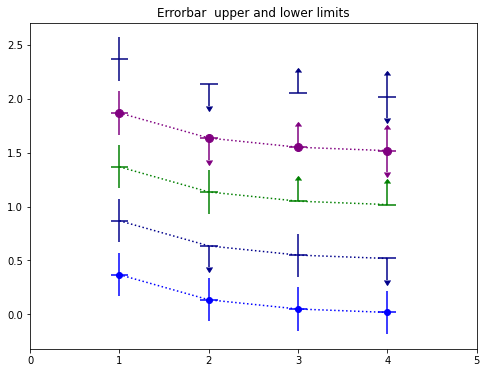

In [ ]:
# sample code 9-7
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(1, 5)
ys = np.exp(-xs)

# error bar length
xerr = 0.1
yerr = 0.2

# Show / hide top and bottom of error bar
uplims = np.array([0, 1, 0, 1], dtype=bool)
lolims = np.array([0, 0, 1, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(1, 1, figsize=(8,6))

# standard error bar
ax.errorbar(
    xs,
    ys,
    xerr=xerr,  # size in x direction
    yerr=yerr,  # size in y direction
    fmt='o',    # marker's shape
    linestyle='dotted',
    color='blue'
    )

# Show / hide the top of error bar
ax.errorbar(
    xs,
    ys + 0.5,
    xerr=xerr,  # size in x direction
    yerr=yerr,  # size in y direction
    uplims=uplims,  # show / hide the top
    linestyle='dotted',
    color='darkblue'
)

# Show / hide the bottom of error bar
ax.errorbar(
    xs,
    ys + 1,
    xerr=xerr,  # size in x direction
    yerr=yerr,  # size in y direction
    lolims=lolims,  # show / hide the bottom
    linestyle='dotted',
    color='green'
)

# Show / hide the top and bottom of error bar 
ax.errorbar(
    xs,
    ys+1.5,
    xerr=xerr,  # size in x direction
    yerr=yerr,  # size in y direction
    uplims=uplims,  # show / hide the top
    lolims=lolims,  # show / hide the bottom
    fmt='o',    # marker's shape
    markersize=8,
    linestyle='dotted',
    color='purple'
)

# Show / hide the top and bottom of error bar
# Hiding the marker also hides the line
ax.errorbar(
    xs,
    ys + 2,
    xerr=xerr,  # size in x direction
    yerr=yerr,  # size in y direction
    uplims=uplims,  # show / hide the top
    lolims=lolims,  # show /hi de the bottom
    fmt='none',    # marker's shape
    markersize=8,
    linestyle='dotted',
    color='navy'
)

# Set x-axis range and graph title
ax.set_xlim((0, 5))
ax.set_title('Errorbar  upper and lower limits')

plt.show()